## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




### Práctica 4 -Solución


**Nombre 1**:
    
**Nombre 2**:

El siguiente código incluye una función para listar contenidos de carpetas así como una variable `path`a la carpeta actual (no modificarlo ni utilizar el nombre `path` para otra variable!). 

En esta práctica vamos a evitar en la medida de lo posible escribir caminos a ficheros directamente y usaremos siempre la constructora Path() para generar nombres de carpetas y ficheros

In [41]:
import pandas as pd
import numpy as np
from pathlib import Path


def lista(path):
    print(path)
    espacio = " "*5
    for p in path.iterdir():
        if p.is_dir():
            print(espacio,p.name,": carpeta",sep="")
        else:
            if p.is_file():
                print(espacio,p.name,": fichero",sep="")
    print("="*40)
                
path = Path.cwd() 
lista(path)

d:\docencia\2223\APD\practicas\practica4
     .ipynb_checkpoints: carpeta
     corregido: carpeta
     download: carpeta
     practica4.ipynb: fichero
     practica4Sol.ipynb: fichero
     preprocess: carpeta
     raw: carpeta


**Pregunta 1** [1 punto] Dentro de la carpeta actual `path`crear tres carpetas,  'download', 'raw', 'preprocess'

In [42]:
# solucion
folders = ["raw","download","preprocess"] 
for f in folders:
    newFolder = Path(path,f)
    newFolder.mkdir(exist_ok=True,parents=True)
    
# para probar; debe aparecer (entre otras cosas), las carpetas download,raw y preprocess
lista(path)    

d:\docencia\2223\APD\practicas\practica4
     .ipynb_checkpoints: carpeta
     corregido: carpeta
     download: carpeta
     practica4.ipynb: fichero
     practica4Sol.ipynb: fichero
     preprocess: carpeta
     raw: carpeta



**Pregunta 2** [2 puntos] El ayuntamiento de madrid ofrece datos de la calidad de la contaminación acústica mes a mes en ficheros anuales accesible en urls de la forma

         https://datos.madrid.es/egob/catalogo/211356-XX-contaminacion-acustica.csv

donde *XX*  varía de 2 en 2 desde 19 hasta 29: 19,21,23,25,27,29 (en total 6 valores que corresponden a los años 2017-2022 ambos inclusive). Iremos descargando los ficheros mediante la librería requests, dejándolos en la  carpeta `download` creada en el apartado anterior con los nombres 19.csv, 21.csv...29.csv


In [43]:
import pandas as pd
import requests

# solución
for i in range(19,30,2):
    url = "https://datos.madrid.es/egob/catalogo/211356-"+str(i)+"-contaminacion-acustica.csv"
    print(url)
    nombre = Path(path,"download",str(i)+".csv")
    r = requests.get(url, allow_redirects=True) # el fichero queda en la variable r
    if r.status_code == 200:
        with open(nombre, 'wb') as f:
            f.write(r.content) # ahora lo grabamos localmente
    else:
        print("Error ",r.status_code)


https://datos.madrid.es/egob/catalogo/211356-19-contaminacion-acustica.csv
https://datos.madrid.es/egob/catalogo/211356-21-contaminacion-acustica.csv
https://datos.madrid.es/egob/catalogo/211356-23-contaminacion-acustica.csv
https://datos.madrid.es/egob/catalogo/211356-25-contaminacion-acustica.csv
https://datos.madrid.es/egob/catalogo/211356-27-contaminacion-acustica.csv
https://datos.madrid.es/egob/catalogo/211356-29-contaminacion-acustica.csv


In [44]:
# para comprobar 
lista(Path(path,"download") ) # debe mostrar 19.csv.....29.csv

d:\docencia\2223\APD\practicas\practica4\download
     19.csv: fichero
     21.csv: fichero
     23.csv: fichero
     25.csv: fichero
     27.csv: fichero
     29.csv: fichero


**Ejercicio 3** [1 punto] El siguiente código lista todos los ficheros .csv de la carpeta download y los deja en una lista csvs

In [45]:
download = Path(path,"download")
csvs = [ p for p in download.iterdir() if p.is_file() and p.suffix==".csv"]
csvs


[WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/19.csv'),
 WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/21.csv'),
 WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/23.csv'),
 WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/25.csv'),
 WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/27.csv'),
 WindowsPath('d:/docencia/2223/APD/practicas/practica4/download/29.csv')]

Se quiere cargar todos estos ficheros con Pandas y dejarlos en una lista de DataFrames de nombre `dfs`, teniendo en cuenta que:

- Son ficheros CSV:
- Separados por ;
- Codificación latin1 

In [46]:
import pandas as pd

# solución
dfs = [pd.read_csv(p,encoding="latin1",sep=";") for p in csvs ]

In [47]:
# para comprobar
for df in dfs:
    print(len(df),df.columns)

370 Index(['Fecha', 'NMT', 'Situación', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01',
       'LAS10', 'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Situación', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01',
       'LAS10', 'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Situación', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01',
       'LAS10', 'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')


**Ejercicio 4** [1.5 puntos] En la comprobación anterior vemos que el personal del ayuntamiento, mostrando un simpático sentido del humor, ha cambiado el nombre de la columna 'Situación' (válido para los 3 primeros dataframes) por 'Nombre" (en los 3 últimos).

Generar una nueva lista de dataframes dfs2 que contenga los mismos dataframes pero reemplazando el nombre de columna `Situación` por `Nombre` en los 3 primeros. Para ese renombramiento se puede usar [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

In [48]:
# solución
dfs2 = [df if 'Situación' not in df.columns else df.rename(columns={"Situación": "Nombre"}) for df in dfs]

In [49]:
# para comprobar; ahora deben salir 6 dataframes con las mismas columnas, aunque el número de filas puede variar en alguno
for df in dfs2:
    print(len(df),df.columns)

370 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')
372 Index(['Fecha', 'NMT', 'Nombre', 'Ld', 'Le', 'Ln', 'LAeq24', 'LAS01', 'LAS10',
       'LAS50', 'LAS90', 'LAS99'],
      dtype='object')


**Ejercicio 5** [1 punto] Por fin podemos proceder a concatenar todos los dataframes en `dfs2` usando `pd.concat`. Dejar el resultado en un dataframe `df` y grabarlo en la carpeta `raw`con nombre 'completo.csv' con encoding latin1 y separado por ;

In [50]:
df = pd.concat(dfs2)
df.to_csv(Path(path,"raw","completo.csv"),encoding="latin1",sep=";",index=False)
# para probar
df  # 2230 rows y 12 columns

Fecha  NMT                    Nombre    Ld    Le    Ln LAeq24 LAS01  \
0    ene-17    1        Paseo de Recoletos  69,1  69,2  66,5   68,2    74   
1    ene-17    2                  Carlos V  70,2  69,8  66,9   69,3  75,5   
2    ene-17    3          Plaza del Carmen  67,7  60,9  62,8   65,8  75,4   
3    ene-17    4           Plaza de España  65,9  65,9  62,4     65  72,7   
4    ene-17    5          Barrio del Pilar  65,7  66,2  60,1   64,6  74,4   
..      ...  ...                       ...   ...   ...   ...    ...   ...   
367  dic-22   48                Castellana    62  60,4  56,9   60,5  66,8   
368  dic-22   50           Pza de Castilla  67,1  66,5  62,1   65,8  72,1   
369  dic-22   54      Ensanche de Vallecas  62,4    62  55,4     61    68   
370  dic-22   55  Urbanización Embajada II  56,9  54,9  49,9   55,2    64   
371  dic-22   86               Tres Olivos  57,9  56,4    49   56,1  65,2   

    LAS10 LAS50 LAS90 LAS99  
0    71,3  65,8  57,9    50  
1    71,4  67,9  61,2  54,8  
2      66  58,5  53,4  50,7  
3    67,4  63,5  56,4  49,1  
4      67  59,7  46,9  37,9  
..    ...   ...   ...   ...  
367  62,5  58,6  51,5  45,8  
368  67,7  63,6  55,9  50,4  
369  64,2  58,5  49,2  48,2  
370  57,4  50,3  43,2  39,1  
371  58,3  48,8  37,2  34,1  

[2230 rows x 12 columns]

**Ejercicio 6** [1 punto] De `df` queremos quedarnos solo con las filas que tienen la columna `Nombre` el indicado en la variable `estacion` y solo con las columnas "Fecha","Ld","Le" y "Ln"  (Ld es el ruido de 7 a 19h. Le de 19 a 23, y Ln de 23 a 7, si alguien quiere ver detalles por curiosidad puede ver una descripción de los metadatos [aquí](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Ruido/Ficheros/INTERPRETE%20DE%20DATOS%20MENSUALES.pdf)). Dejar el resultado en un dataframe `df2`

In [51]:
df2 = df.copy()
estacion = "Cuatro Caminos"
# solución
df2 = df[df.Nombre==estacion][["Fecha","Ld","Le","Ln"]] #,"LAeq24", "LAS01","LAS10","LAS50","LAS90","LAS99"]]
df2

Fecha    Ld    Le    Ln
7    ene-17  66,5  65,5  60,2
38   feb-17  67,1  65,7  60,7
69   mar-17  66,4  65,4  59,7
100  abr-17  65,3  64,6  59,6
131  may-17  65,6  64,7  59,4
..      ...   ...   ...   ...
224  ago-22  63,8  61,6  56,6
255  sep-22  73,1  63,4  59,2
286  oct-22    69  63,9  58,5
317  nov-22  65,2  64,3  59,5
348  dic-22  65,6  64,4  59,2

[72 rows x 4 columns]

**Ejercicio  7** [1.5 puntos] En df2 queremos convertir la fecha en dos columnas:
- Mes (las 3 primeras letras del mes) 
- Año (un número de 17 a 22). El resultado será un dataframe  `df3`con columnas: Ld, 	Le, 	Ln, 	Mes y	Año. 

Ayuda:

- `df2.Fecha.str` permite acceder a la columna Fecha como si fuera un string
- Si `df.c` es una columna de tipo string pero sabemos que contiene un entero podemos cambiar su tipo con `df.c.astype("int")`

In [52]:
df3 = df2.copy()
# solución
df3["Mes"] = df2.Fecha.str[0:3]
df3["Año"] = df2.Fecha.str[4:].astype("int")
df3 = df3.drop(["Fecha"],axis=1)

Solución alternativa, más general y elegante, propuesta por Mario y Artem

In [53]:
df3 = df2.copy()
df3[["Mes", "Año"]] = df3.Fecha.str.split("-", expand=True)
df3 = df3.drop(["Fecha"],axis=1)
df3

Ld    Le    Ln  Mes Año
7    66,5  65,5  60,2  ene  17
38   67,1  65,7  60,7  feb  17
69   66,4  65,4  59,7  mar  17
100  65,3  64,6  59,6  abr  17
131  65,6  64,7  59,4  may  17
..    ...   ...   ...  ...  ..
224  63,8  61,6  56,6  ago  22
255  73,1  63,4  59,2  sep  22
286    69  63,9  58,5  oct  22
317  65,2  64,3  59,5  nov  22
348  65,6  64,4  59,2  dic  22

[72 rows x 5 columns]

In [54]:
# Para probar
df3

Ld    Le    Ln  Mes Año
7    66,5  65,5  60,2  ene  17
38   67,1  65,7  60,7  feb  17
69   66,4  65,4  59,7  mar  17
100  65,3  64,6  59,6  abr  17
131  65,6  64,7  59,4  may  17
..    ...   ...   ...  ...  ..
224  63,8  61,6  56,6  ago  22
255  73,1  63,4  59,2  sep  22
286    69  63,9  58,5  oct  22
317  65,2  64,3  59,5  nov  22
348  65,6  64,4  59,2  dic  22

[72 rows x 5 columns]

**Ejercicio 8** [1 punto] Nos gustaría hacer una gráfica de la evolución del ruido. Algo como:

In [55]:
import matplotlib.pyplot as plt
#df3.Ld.plot() # da error

¿Qué ocurre? Descubrir el problema e intentar solucionarlo dejando el resultado en un dataframe `df4` 

In [56]:
# quitamos las filas con error
df4 =df3.copy()
for c in df4.columns[:3]:
    df4 = df4[df4[c]!="N/D"]
limpio = Path(path,"preprocess","limpio.csv")
# fichero preparado
df4.to_csv(limpio,encoding="latin1",sep=";",index=False)

In [57]:
df4 = pd.read_csv(limpio,sep=";",decimal=",",encoding="latin1")
df4

Ld    Le    Ln  Mes  Año
0   66.5  65.5  60.2  ene   17
1   67.1  65.7  60.7  feb   17
2   66.4  65.4  59.7  mar   17
3   65.3  64.6  59.6  abr   17
4   65.6  64.7  59.4  may   17
..   ...   ...   ...  ...  ...
67  63.8  61.6  56.6  ago   22
68  73.1  63.4  59.2  sep   22
69  69.0  63.9  58.5  oct   22
70  65.2  64.3  59.5  nov   22
71  65.6  64.4  59.2  dic   22

[72 rows x 5 columns]

Usar este código para probar (no hace falta entenderlo de momento)

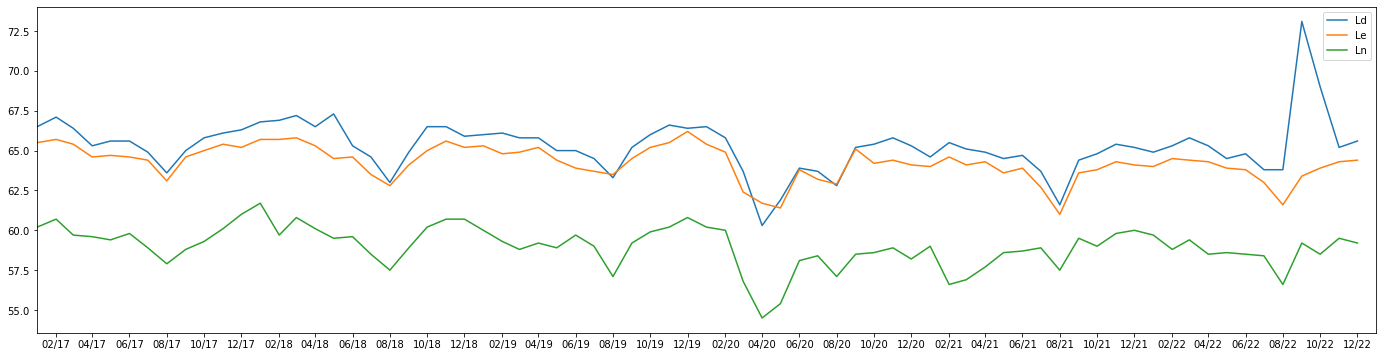

In [58]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep',
       'oct', 'nov', 'dic']
dmes =dict()
for i,m in enumerate(meses):
    dmes[m]=i
df5 = df4.copy()
df5["nummes"] =df5.Mes.map(lambda x: str(dmes[x]+1)+"/")
df5["Año"] = df5["Año"].map(lambda x: str(x+2000))
df5["fecha"]=df5["nummes"]+df5["Año"]
df5.index = pd.to_datetime(df5.fecha)
fig, ax = plt.subplots(figsize=(24, 6))
for c in df5.columns[:-4]:
    ax.plot(df5.index,df5[c],label=c)

date_form = DateFormatter("%m/%y")    
ax.xaxis.set_major_formatter(date_form)

ax.set(xlim=["2016-12-31", "2022-12-31"])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # leyenda en X cada 2 meses
plt.legend()    
plt.show()    

In [59]:
df5

Ld    Le    Ln  Mes   Año nummes    fecha
fecha                                                  
2017-01-01  66.5  65.5  60.2  ene  2017     1/   1/2017
2017-02-01  67.1  65.7  60.7  feb  2017     2/   2/2017
2017-03-01  66.4  65.4  59.7  mar  2017     3/   3/2017
2017-04-01  65.3  64.6  59.6  abr  2017     4/   4/2017
2017-05-01  65.6  64.7  59.4  may  2017     5/   5/2017
...          ...   ...   ...  ...   ...    ...      ...
2022-08-01  63.8  61.6  56.6  ago  2022     8/   8/2022
2022-09-01  73.1  63.4  59.2  sep  2022     9/   9/2022
2022-10-01  69.0  63.9  58.5  oct  2022    10/  10/2022
2022-11-01  65.2  64.3  59.5  nov  2022    11/  11/2022
2022-12-01  65.6  64.4  59.2  dic  2022    12/  12/2022

[72 rows x 7 columns]

**Recordar subir el notebook con las respuestas**

Ejecutar el siguiente código solo si se quieren borrar las carpetas creadas y todo su contenido (por ejemplo por un error)

In [19]:
from shutil import rmtree
from pathlib import Path

path = Path.cwd()
raw = Path(path,"raw")
download = Path(path,"downdload")
preprocess = Path(path,"preprocess")
rmtree(raw,ignore_errors=True) # para que no dé error si no existe
rmtree(download,ignore_errors=True) # para que no dé error si no existe
rmtree(preprocess,ignore_errors=True) # para que no dé error si no existe